# Task C: Signal Classification with FANNs

In [ ]:
import os
from google.colab import drive
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

drive.mount('/content/gdrive')

from gdrive.MyDrive import assignment_ann as a4

Mounted at /content/gdrive


In [ ]:
os.chdir("gdrive/MyDrive")

In [ ]:
signal_dataset = a4.SignalDataset() # Provides back a PyTorch Dataset OBJECT!
size_of_signal_dataset = len(signal_dataset) # Print size of whole dataset

# Making a PyTorch DataLoader Object specifically for your Signal dataset that you got above.
signal_dataloader = DataLoader(dataset = signal_dataset, batch_size = 50, shuffle = True)

(a) How large is the original dataset?

In [ ]:
size_of_signal_dataset # How large is the original dataset

1384

(b) How long is each signal vector?

In [ ]:
len(signal_dataset.__getitem__(0)[0]) # How long is each signal vector

500

(c) Plot a couple of the signals with there labels (normal / abnormal) in the plot title.

In [ ]:
# Pick up the csv files from train folder by ourselves.

# PICK ID_0_0.CSV
sample_0_0 = signal_dataset.__getitem__(0)[0]
# plt.plot(sample)

# ID_0_1.CSV
sample_0_1 = signal_dataset.__getitem__(1)[0]

# ID_102_0.CSV
sample_102_0 = signal_dataset.__getitem__(4)[0]

# ID_102_1.CSV
sample_102_1 = signal_dataset.__getitem__(5)[0]

# ID_103_0.CSV
sample_103_0 = signal_dataset.__getitem__(6)[0]

# ID_103_1.CSV
sample_103_1 = signal_dataset.__getitem__(7)[0]

Text(0.5, 1.0, 'Abnormal-Signal: max: 1.0 - min: 0.0')

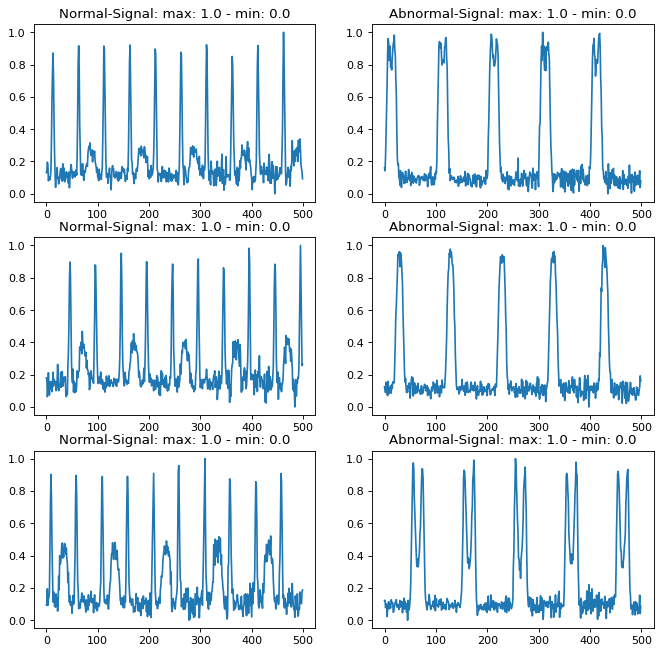

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 10), dpi = 80)
plt.figure(1)
ax1 = plt.subplot(321)
ax1.plot(sample_0_0)
ax1.set_title('Normal-Signal: max: 1.0 - min: 0.0')

ax2 = plt.subplot(322)
ax2.plot(sample_0_1)
ax2.set_title('Abnormal-Signal: max: 1.0 - min: 0.0')

ax3 = plt.subplot(323)
ax3.plot(sample_102_0)
ax3.set_title('Normal-Signal: max: 1.0 - min: 0.0')

ax4 = plt.subplot(324)
ax4.plot(sample_102_1)
ax4.set_title('Abnormal-Signal: max: 1.0 - min: 0.0')

ax5 = plt.subplot(325)
ax5.plot(sample_103_0)
ax5.set_title('Normal-Signal: max: 1.0 - min: 0.0')

ax6 = plt.subplot(326)
ax6.plot(sample_103_1)
ax6.set_title('Abnormal-Signal: max: 1.0 - min: 0.0')

(d) Split the original dataset into train-, validation- and test-sets.

In [ ]:
# SPLITTING DATA INTO 'TRAIN-', 'VAL-' AND 'TEST-' sets.

# Init your PyTorch Dataset object
original_data = signal_dataset
size_of_original_data = len(original_data)

# Specify split fractions: !Must sum to 1!
train_fraction = 0.70
val_fraction = 0.20
test_fraction = 0.10

# Determine size of each set
train_dataset_size = int(train_fraction * size_of_original_data)
val_dataset_size = int(val_fraction * size_of_original_data)
test_dataset_size = int(size_of_original_data - train_dataset_size - val_dataset_size)

# Split whole original data into train, val and test datsets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    original_data,
    [train_dataset_size, val_dataset_size, test_dataset_size])

In [ ]:
# Sanity checking
print(f" Train set Size: {len(train_dataset)}")
print(f" Val set Size: {len(val_dataset)}")
print(f" Test set Size: {len(test_dataset)}")

 Train set Size: 968
 Val set Size: 276
 Test set Size: 140


In [ ]:
train_dataloader = DataLoader(dataset = train_dataset, batch_size = 25, shuffle = True)

(e) Choose a first preliminary ANN architecture that seems suitable for this 2-class classification
task.

In [ ]:
import torch
from torch import nn

# Define a first preliminary ANN architecture
model = nn.Sequential(
    nn.Linear(in_features = 500, out_features = 100),
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 2)  
)

# Cost function
cost_function = nn.CrossEntropyLoss()

# Choose optimizer
optim = torch.optim.SGD(model.parameters(), lr = 0.05)

(f) Implement a very basic training loop consisting of only the mini-batch SGD inner-loop.

In [ ]:
training_minibatch_Js =[]
nr_epochs = 20
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in train_dataloader:
        y_preds = model(X_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

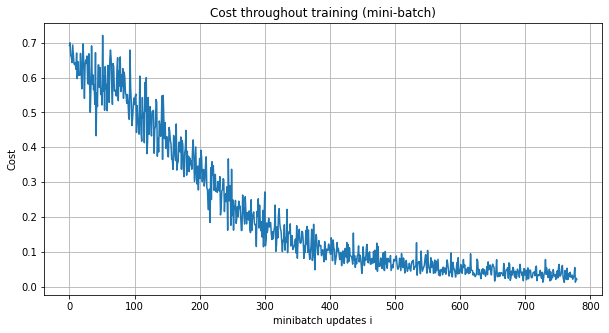

In [ ]:
import matplotlib.pyplot as plt

# total number of steps = minibatch * epoch = (968 / 25) * 20
# Plot the cost
plt.figure(figsize = [10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('minibatch updates i')
plt.ylabel('Cost')
plt.title('Cost throughout training (mini-batch)')
plt.grid()

In [ ]:
with torch.no_grad():
    raw_y_preds = model(X_batch) # predict model output for X batch

    y_class_preds = raw_y_preds.argmax(dim = 1)

tensor([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

(g) Define the function for model performance evaluation.

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model_performance(dataset, model):
# Function that takes in a model and a dataset
# and outputs an performance estimate of the classification
# accuracy of the model.

# Make a Dataloader for the dataset.
# Note, we are not performing any SGD here, so our batch
# size is the whole # dataset we want to evaluate model performance on.
    d_loader = DataLoader(dataset = dataset, batch_size = len(dataset))

    cost_function = nn.CrossEntropyLoss() # For classification evaluation
    model.eval()
    # Make predictions for the eval dataset
    with torch.no_grad():
        for X, y in d_loader:
            raw_y_preds = model(X)

        y_class_preds = raw_y_preds.argmax(dim = 1)
        eval_cost = cost_function(raw_y_preds, y).item()
    model.train()

    # compare predictions with true labels and compute performance metric
    # performance metric in this example is classification accuracy
    eval_acc = accuracy_score(y_pred = y_class_preds, y_true = y)

    return eval_cost, eval_acc

(h) Integrate your model performance evaluation function into your training loop and perform model
evaluation on both validation and train sets every epoch before the inner SGD training loop.

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features = 500, out_features = 100),
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 2)  
)

# Cost function
cost_function = nn.CrossEntropyLoss()

# Choose optimizer
optim = torch.optim.SGD(model.parameters(), lr = 0.5)

# Trace the cost in mini-batch
training_minibatch_Js =[]

# Traceback the cross entropy cost in the train set and the validation set
cross_entropy_cost_train = []
cross_entropy_cost_val = []

# Traceback the accuracy in the train set and the validation set
accuracy_train = []
accuracy_val = []

nr_epochs = 20

for epoch_i in range(nr_epochs):
    eval_every_kth = 1
    if epoch_i % eval_every_kth == 0: # Eval model very k'th epoch.
        model.eval() # set model into evaluate mode #
        # EVALUATE Model 'performance' on whole train and validation dataset
        train_cost, train_acc = evaluate_model_performance(model = model, dataset = train_dataset)
        val_cost, val_acc = evaluate_model_performance(model = model, dataset = val_dataset)
        model.train() # reset model into train mode.

        # track performance measures from both train and val sets
        print("Epoch: {} - Train cost: {}, Train Acc: {}".format(epoch_i, train_cost, train_acc))
        print("Epoch: {} - Val cost: {}, Val Acc: {}".format(epoch_i, val_cost, val_acc))

        cross_entropy_cost_train.append(train_cost)
        cross_entropy_cost_val.append(val_cost)

        accuracy_train.append(train_acc)
        accuracy_val.append(val_acc)

        # Optional stopping criteria based on validation and/or
        # train set performance/cost to avoid overfitting.

    for X_batch, y_batch in train_dataloader:
        y_preds = model(X_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

Epoch: 0 - Train cost: 0.6962118148803711, Train Acc: 0.4669421487603306
Epoch: 0 - Val cost: 0.6958681344985962, Val Acc: 0.4746376811594203
Epoch: 1 - Train cost: 0.26266565918922424, Train Acc: 0.9586776859504132
Epoch: 1 - Val cost: 0.27585023641586304, Val Acc: 0.9239130434782609
Epoch: 2 - Train cost: 0.07936161011457443, Train Acc: 0.9803719008264463
Epoch: 2 - Val cost: 0.08915773034095764, Val Acc: 0.9818840579710145
Epoch: 3 - Train cost: 0.05276229605078697, Train Acc: 0.9886363636363636
Epoch: 3 - Val cost: 0.03906960040330887, Val Acc: 0.9963768115942029
Epoch: 4 - Train cost: 0.05890606343746185, Train Acc: 0.981404958677686
Epoch: 4 - Val cost: 0.03466174751520157, Val Acc: 0.9927536231884058
Epoch: 5 - Train cost: 0.02087978646159172, Train Acc: 0.993801652892562
Epoch: 5 - Val cost: 0.016366278752684593, Val Acc: 1.0
Epoch: 6 - Train cost: 0.02138569951057434, Train Acc: 0.9948347107438017
Epoch: 6 - Val cost: 0.007007504813373089, Val Acc: 1.0
Epoch: 7 - Train cost: 0

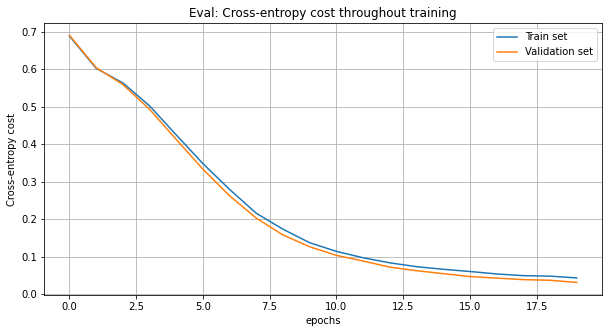

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10, 5])
plt.plot(cross_entropy_cost_train, label = 'Train set')
plt.plot(cross_entropy_cost_val, label = 'Validation set')
plt.xlabel('epochs')
plt.ylabel('Cross-entropy cost')
plt.title('Eval: Cross-entropy cost throughout training')
plt.legend()
plt.grid()

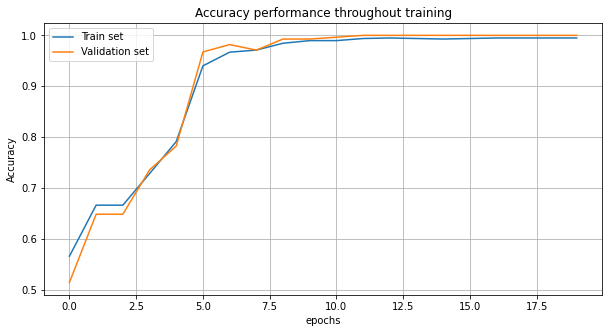

In [ ]:
plt.figure(figsize = [10, 5])
plt.plot(accuracy_train, label = 'Train set')
plt.plot(accuracy_val, label = 'Validation set')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy performance throughout training')
plt.legend()
plt.grid()